<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Kaggle-Competitions/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Read Data**

In [2]:
train_data        = pd.read_csv ('train.csv')
test_data         = pd.read_csv ('test.csv')
PId_test = pd.DataFrame(test_data["PassengerId"])
PId_test.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


**save PassengerId to sumbition**

**As wee see there are outliers in our Data set**                              
**in Age min is Zero !!!!!!!!!!!!!!!!!!**

In [3]:
zero_Age_train = (train_data["Age"]==0).sum() # 178
train_data[train_data["Age"]==0].head()
# print(zero_Age_train)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False


In [4]:
zero_Age_test = (test_data["Age"]==0).sum() # 90
test_data[train_data["Age"]==0].head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\1551436007.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data[train_data["Age"]==0].head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
61,0143_01,Europa,False,C/2/P,55 Cancri e,30.0,False,0.0,8853.0,6108.0,29.0,3523.0,Alaton Unloweedic
86,0187_01,Mars,True,F/38/S,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Ranuts Kidne
102,0228_03,Europa,True,B/4/S,55 Cancri e,42.0,False,0.0,0.0,0.0,0.0,0.0,Alurops Dompul
157,0339_05,Earth,True,G/56/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Davisy Colleruces


In [5]:
#Drop Name column as it is not required

train_data.drop(columns=['Name'],axis=1,inplace=True)
test_data.drop(columns=['Name'],axis=1,inplace=True)

In [6]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

# **dealing with Nulls**

**Handling Missing Values**                                                
separate Numerical and categorical Features.                             
fill numerical with mean or median (outliers).                              
fill categorical with mode.                             

In [7]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

**First we will separate Numerical Features and Categorical**

In [8]:
Numerical_Features= train_data.select_dtypes(include = ["int64" , "float64"]).columns
Numerical_Features_with_null = [x for x in Numerical_Features if (train_data[x].isnull().sum() >0) & (x != "Age")]
print(f"NumericalFeatures :\n{Numerical_Features} ]\n\nNumerical_Features_with_null :\n{Numerical_Features_with_null}")

NumericalFeatures :
Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object') ]

Numerical_Features_with_null :
['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [9]:
categorical_Feature = train_data.select_dtypes(include = "object" ).columns
categorical_Feature_with_null = [x for x in categorical_Feature if train_data[x].isnull().sum() >0]
print(f"categorical Feature :\n{categorical_Feature}\n\n\ncategorical_Feature_with_null :{categorical_Feature_with_null}")

categorical Feature :
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'VIP'],
      dtype='object')


categorical_Feature_with_null :['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']


####  **outliers in numerical Features & Filling Nulls**                                     


**first : Numerical Features**                                            
if the feature has outliers --- > fill nulls with median                                 
if not                       ---> fill nulls with mean

In [10]:
def calc_visualize_outliers (data , cols ):
  # Calculate quartiles for each column
  q1 = data[cols].quantile(0.25)
  q3 = data[cols].quantile(0.75)

  iqr = q3 - q1

  # print(f"q1 :\n{q1}\nq3 :\n{q3}")# Calculate IQR (Interquartile Range) for each column
  # Calculate lower and upper bounds for outliers for each column
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  # print(f"upper_bound :\n{upper_bound}\nlower_bound :\n{lower_bound}\n")
  # Find outliers in each column
  outliers = {}
  null_cols_with_no_outlires = []
  null_cols_with_outlires = []
  for column in cols:
      outliers[column] = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])][column].tolist()

      print(f"{column} :: \nq1 :{q1[column]}\nq3 :{q3[column]}")# Calculate IQR (Interquartile Range) for each column
      print(f"upper_bound :\n{upper_bound[column]}\nlower_bound :\n{lower_bound[column]}\n")
      print(f"number of outliers = {len(outliers[column])} , Outliers : {outliers[column]}")
      if (len(outliers[column]) == 0 ):
        null_cols_with_no_outlires.append(column)
      else :
        null_cols_with_outlires.append(column)


      plt.figure(figsize=(6, 4))
      data.boxplot(column=column)
      plt.title(f'Box Plot of {column}')
      plt.xlabel('Data')
      plt.ylabel('values')
      plt.grid(True)
      plt.show()

      print("________________________________________________________________________________________________________________________________")
      print("________________________________________________________________________________________________________________________________\n\n")
  return   null_cols_with_no_outlires , null_cols_with_outlires

RoomService :: 
q1 :0.0
q3 :47.0
upper_bound :
117.5
lower_bound :
-70.5

number of outliers = 1861 , Outliers : [303.0, 719.0, 1286.0, 412.0, 980.0, 1125.0, 214.0, 784.0, 554.0, 970.0, 790.0, 279.0, 1946.0, 793.0, 887.0, 190.0, 147.0, 7406.0, 688.0, 211.0, 311.0, 1743.0, 562.0, 2209.0, 701.0, 2353.0, 2103.0, 2738.0, 440.0, 1072.0, 4119.0, 1365.0, 287.0, 3414.0, 406.0, 1052.0, 902.0, 848.0, 192.0, 147.0, 367.0, 1517.0, 122.0, 2237.0, 1215.0, 1933.0, 1230.0, 915.0, 1406.0, 181.0, 637.0, 313.0, 2947.0, 335.0, 272.0, 702.0, 1664.0, 118.0, 146.0, 368.0, 1194.0, 331.0, 386.0, 1018.0, 247.0, 443.0, 5715.0, 695.0, 417.0, 121.0, 434.0, 142.0, 520.0, 2001.0, 148.0, 358.0, 2832.0, 5649.0, 198.0, 348.0, 391.0, 1056.0, 1770.0, 353.0, 177.0, 1134.0, 691.0, 1094.0, 417.0, 1483.0, 382.0, 2484.0, 1869.0, 1352.0, 757.0, 210.0, 2156.0, 865.0, 928.0, 172.0, 513.0, 1821.0, 1246.0, 1445.0, 553.0, 1172.0, 3573.0, 1471.0, 930.0, 666.0, 126.0, 1440.0, 840.0, 697.0, 1908.0, 530.0, 1911.0, 2648.0, 234.0, 801.0,

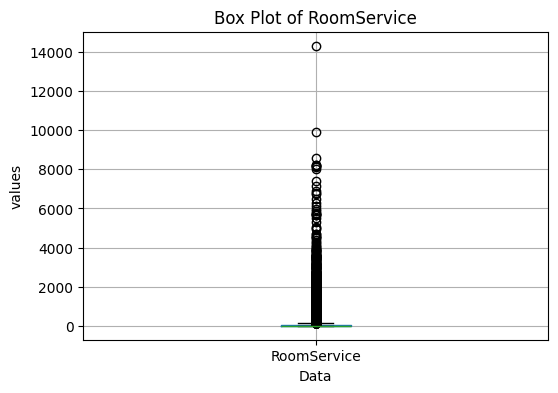

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


FoodCourt :: 
q1 :0.0
q3 :76.0
upper_bound :
190.0
lower_bound :
-114.0

number of outliers = 1823 , Outliers : [3576.0, 1283.0, 483.0, 1539.0, 785.0, 7295.0, 974.0, 225.0, 6073.0, 850.0, 964.0, 492.0, 195.0, 605.0, 1096.0, 592.0, 258.0, 2165.0, 8397.0, 5840.0, 697.0, 1208.0, 856.0, 2811.0, 427.0, 410.0, 331.0, 11418.0, 2537.0, 2223.0, 2344.0, 597.0, 334.0, 418.0, 420.0, 1688.0, 985.0, 10346.0, 219.0, 972.0, 2433.0, 1720.0, 281.0, 888.0, 1249.0, 3571.0, 695.0, 615.0, 4810.0, 231.0, 2390.0, 918.0, 654.0, 1281.0, 587.0, 4458.0, 6500.0, 422.0, 584.0, 230.0, 540.0, 2628.0, 4651.0, 317.0, 349.0, 2876.0, 1198.0, 212.0, 1068.0, 215.0, 235.0, 2491.0, 773.0, 747.0, 5728.0, 11003.0, 608.0, 420.0, 896.0, 465.0, 7255.0, 1170.0, 3584.0, 4118.0

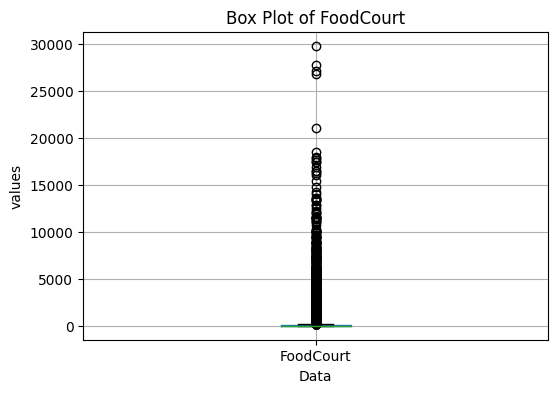

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


ShoppingMall :: 
q1 :0.0
q3 :27.0
upper_bound :
67.5
lower_bound :
-40.5

number of outliers = 1829 , Outliers : [371.0, 151.0, 589.0, 1123.0, 876.0, 69.0, 136.0, 81.0, 1411.0, 1750.0, 180.0, 1938.0, 3374.0, 148.0, 197.0, 446.0, 738.0, 1018.0, 1295.0, 670.0, 957.0, 526.0, 570.0, 326.0, 87.0, 804.0, 429.0, 296.0, 730.0, 126.0, 97.0, 210.0, 161.0, 673.0, 426.0, 401.0, 867.0, 719.0, 137.0, 307.0, 119.0, 188.0, 301.0, 221.0, 665.0, 256.0, 691.0, 796.0, 287.0, 541.0, 408.0, 313.0, 592.0, 128.0, 2078.0, 88.0, 1324.0, 259.0, 1359.0, 157.0, 74.0, 209.0, 784.0, 251.0, 211.0, 634.0, 1434.0, 202.0, 1865.0, 2975.0, 453.0, 4447.0, 592.0, 558.0, 786.0, 591.0, 881.0, 356.0, 552.0, 1116.0, 101.0, 5952.0, 7185.0, 840.0, 102.0, 136.0, 795.0, 188.0,

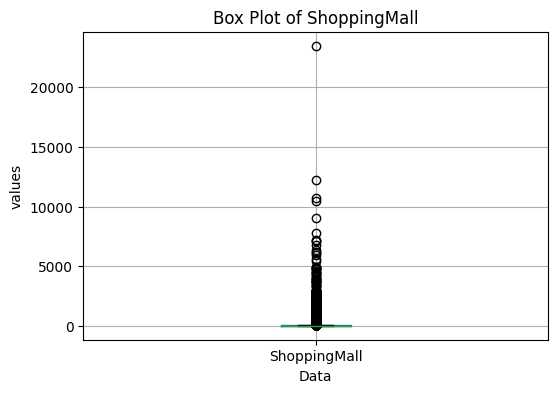

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


Spa :: 
q1 :0.0
q3 :59.0
upper_bound :
147.5
lower_bound :
-88.5

number of outliers = 1788 , Outliers : [549.0, 6715.0, 3329.0, 565.0, 291.0, 216.0, 998.0, 1438.0, 437.0, 990.0, 951.0, 2606.0, 2511.0, 1379.0, 4683.0, 286.0, 1377.0, 253.0, 321.0, 638.0, 188.0, 830.0, 3929.0, 1868.0, 238.0, 699.0, 316.0, 564.0, 221.0, 14970.0, 299.0, 202.0, 898.0, 1072.0, 795.0, 878.0, 1125.0, 182.0, 234.0, 1634.0, 713.0, 1720.0, 1438.0, 4812.0, 283.0, 584.0, 8620.0, 299.0, 981.0, 754.0, 888.0, 162.0, 1157.0, 1090.0, 1851.0, 4476.0, 318.0, 170.0, 148.0, 1476.0, 274.0, 280.0, 685.0, 177.0, 441.0, 2766.0, 176.0, 5132.0, 2579.0, 1173.0, 3693.0, 1508.0, 8157.0, 3835.0, 6011.0, 310.0, 567.0, 1537.0, 352.0, 5467.0, 562.0, 715.0, 2962.0, 622.0, 467.0, 193

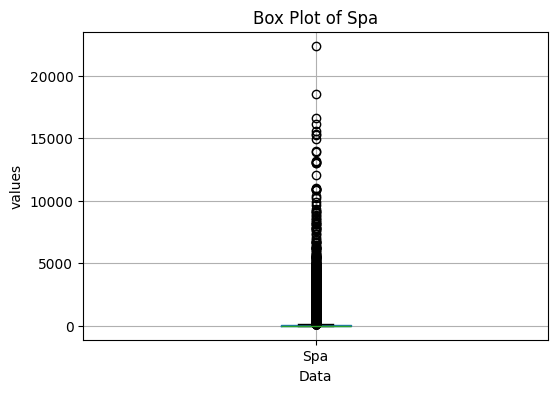

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________


VRDeck :: 
q1 :0.0
q3 :46.0
upper_bound :
115.0
lower_bound :
-69.0

number of outliers = 1809 , Outliers : [193.0, 124.0, 637.0, 679.0, 328.0, 453.0, 1229.0, 401.0, 855.0, 127.0, 460.0, 726.0, 1063.0, 506.0, 9654.0, 513.0, 637.0, 131.0, 764.0, 1687.0, 445.0, 404.0, 6898.0, 207.0, 462.0, 607.0, 135.0, 137.0, 567.0, 175.0, 2111.0, 119.0, 232.0, 956.0, 575.0, 443.0, 705.0, 122.0, 739.0, 387.0, 146.0, 1918.0, 1099.0, 1023.0, 319.0, 1116.0, 10912.0, 1063.0, 2054.0, 803.0, 1240.0, 333.0, 1460.0, 828.0, 262.0, 1370.0, 5166.0, 2469.0, 241.0, 1330.0, 202.0, 1260.0, 552.0, 1057.0, 907.0, 572.0, 417.0, 1023.0, 230.0, 8188.0, 697.0, 2175.0, 1059.0, 164.0, 368.0, 140.0, 128.0, 987.0, 5688.0, 1699.0, 223.0, 1241.0, 792.0, 3139.0, 225.0, 3656.0

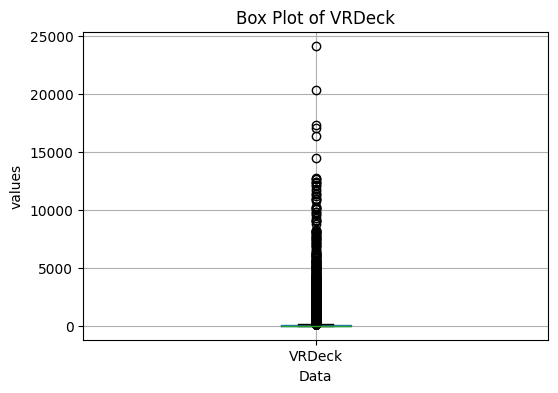

________________________________________________________________________________________________________________________________
________________________________________________________________________________________________________________________________




In [11]:
null_cols_with_no_outlires , null_cols_with_outlires =  calc_visualize_outliers (train_data , Numerical_Features_with_null)

In [12]:
null_cols_with_no_outlires , null_cols_with_outlires

([], ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [13]:
# Replace missing values in "RoomService" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "RoomService"] = train_data.loc[train_data["Age"] < 20, "RoomService"].fillna(0)

# Replace missing values in "FoodCourt" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "FoodCourt"] = train_data.loc[train_data["Age"] < 20, "FoodCourt"].fillna(0)

# Replace missing values in "ShoppingMall" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "ShoppingMall"] = train_data.loc[train_data["Age"] < 20, "ShoppingMall"].fillna(0)

# Replace missing values in "Spa" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "Spa"] = train_data.loc[train_data["Age"] < 20, "Spa"].fillna(0)


# Replace missing values in "VRDeck" column with 0 for passengers under 20 years old
train_data.loc[train_data["Age"] < 20, "VRDeck"] = train_data.loc[train_data["Age"] < 20, "VRDeck"].fillna(0)




#*********************************************************************************************************************************
# Replace missing values in "RoomService" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "RoomService"] = test_data.loc[test_data["Age"] < 20, "RoomService"].fillna(0)

# Replace missing values in "FoodCourt" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "FoodCourt"] = test_data.loc[test_data["Age"] < 20, "FoodCourt"].fillna(0)

# Replace missing values in "ShoppingMall" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "ShoppingMall"] = test_data.loc[test_data["Age"] < 20, "ShoppingMall"].fillna(0)

# Replace missing values in "Spa" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "Spa"] = test_data.loc[test_data["Age"] < 20, "Spa"].fillna(0)


# Replace missing values in "VRDeck" column with 0 for passengers under 20 years old
test_data.loc[test_data["Age"] < 20, "VRDeck"] = test_data.loc[test_data["Age"] < 20, "VRDeck"].fillna(0)




In [14]:
for i in Numerical_Features_with_null :
  mid = train_data[i].mean()
  train_data[i].fillna(mid, inplace=True)

for i in Numerical_Features_with_null :
  mid = test_data[i].mean()
  test_data[i].fillna(mid, inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\2343455172.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[i].fillna(mid, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\2343455172.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

**2. Categorical Features**

In [15]:
categorical_Feature_with_null

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [16]:
for i in categorical_Feature_with_null :
  mode = train_data[i].mode()[0]
  train_data[i].fillna(mode, inplace=True)

for i in categorical_Feature_with_null :
  mode = test_data[i].mode()[0]
  test_data[i].fillna(mode, inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\1669649009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[i].fillna(mode, inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\1669649009.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data[i].fillna(mode, inplace=True)
C:\Use

In [17]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [18]:
test_data.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age             91
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

# **from Passenger Id**
1. **Group name**	                                              


1.PassengerId - A unique Id for each passenger.     


---


 Each Id takes the form **gggg_pp**                                            
**gggg** indicates a **group the passenger** is travelling with              
**pp** is their **number within the group**.

In [19]:
def grop_number (id):
  group = id.split('_')[0]
  return group
# grop_number(train_data['PassengerId'])
train_data["Groupname"] = train_data["PassengerId"].apply(grop_number)
test_data["Groupname"]   = test_data["PassengerId"].apply(grop_number)

In [20]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013


In [21]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001


In [22]:
train_data["Groupname"].dtypes

dtype('O')

In [23]:
train_data["Groupname"] = train_data["Groupname"].astype("int64")
test_data["Groupname"] = test_data["Groupname"].astype("int64")


In [24]:
test_data["Groupname"].dtypes

dtype('int64')

# **from cabin**
1.**Cabin Deck**                                               
2.**Cabin Num**                                          
3.**Cabin Side**

 cabin number where the passenger is staying.                      
Takes the form **deck/num/side**,                     
**side** can be either **P for Port or S for Starboard**.           

In [25]:
def CabinDeck ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[0]
  else :
    return None

train_data["CabinDeck"] = train_data["Cabin"].apply(CabinDeck)
test_data["CabinDeck"] = test_data["Cabin"].apply(CabinDeck)

In [26]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B


In [27]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G


In [28]:
#B/0/P
def CabinNum ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[1].split('/')[0]
  else :
    return None

train_data["CabinNum"] = train_data["Cabin"].apply(CabinNum)
test_data["CabinNum"] = test_data["Cabin"].apply(CabinNum)

In [29]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0


In [30]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3


In [31]:
#B/0/P
def CabinSide ( cabin):
  if (not pd.isnull(cabin)) :
    return cabin.split('/')[2]
  else :
    return None

train_data["CabinSide"] = train_data["Cabin"].apply(CabinSide)
test_data["CabinSide"] = test_data["Cabin"].apply(CabinSide)

In [32]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P


In [33]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3,S


# **from Age**
**Age Group -- > "Child", "Teenager", "Adult", "Senior"**

In [34]:
def AgeGroup (age) :
  if (not pd.isnull(age)) :
    if (age <= 5):
      return "Baby"
    elif (age <= 12):
      return "Child"
    elif age <= 18 :
      return "Teen"
    elif age <= 50 :
      return "Adult"
    else :
      return "Elderly"
  else :
    return "Baby"

train_data ["AgeGroup"] = train_data["Age"].apply(AgeGroup)
test_data ["AgeGroup"] = test_data["Age"].apply(AgeGroup)

In [35]:
train_data["Age"].fillna("Baby", inplace=True)
test_data["Age"].fillna("Baby", inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\3493899129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna("Baby", inplace=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_26156\3493899129.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Baby' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_data["Age"].fillna("Baby", inplace=True)
C:\Users\KIIT\AppData\Local\Temp\i

In [36]:
test_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,13,G,3,S,Adult


In [37]:
train_data.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,Adult


In [38]:
test_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Groupname       0
CabinDeck       0
CabinNum        0
CabinSide       0
AgeGroup        0
dtype: int64

In [39]:
train_data = train_data.drop(columns=[ "Cabin" ,"PassengerId","Age" ])
test_data  = test_data.drop(columns=["Cabin" , "PassengerId" , "Age"])

# **From (RoomService, FoodCourt, ShoppingMall, Spa, VRDec)**
total cost

In [40]:
train_data['TotalCosts'] = train_data['RoomService']  + train_data['FoodCourt']  + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['TotalCosts'] = test_data['RoomService']  + test_data['FoodCourt']  + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']


# **label encoding**

In [41]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0,False,1,B,0,P,Adult,0.0


In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train_data['HomePlanet']= label_encoder.fit_transform(train_data['HomePlanet'])
train_data['Destination']= label_encoder.fit_transform(train_data['Destination'])
train_data['CryoSleep']= label_encoder.fit_transform(train_data['CryoSleep'])
train_data['Transported']= label_encoder.fit_transform(train_data['Transported'])
train_data['VIP']= label_encoder.fit_transform(train_data['VIP'])
train_data['CabinDeck']= label_encoder.fit_transform(train_data['CabinDeck'])
train_data['AgeGroup']= label_encoder.fit_transform(train_data['AgeGroup'])
train_data['CabinSide']= label_encoder.fit_transform(train_data['CabinSide'])

In [43]:
# Encode labels in column 'species'.
test_data['HomePlanet']= label_encoder.fit_transform(test_data['HomePlanet'])
test_data['Destination']= label_encoder.fit_transform(test_data['Destination'])
test_data['CryoSleep']= label_encoder.fit_transform(test_data['CryoSleep'])
test_data['VIP']= label_encoder.fit_transform(test_data['VIP'])
test_data['CabinDeck']= label_encoder.fit_transform(test_data['CabinDeck'])
test_data['AgeGroup']= label_encoder.fit_transform(test_data['AgeGroup'])
test_data['CabinSide']= label_encoder.fit_transform(test_data['CabinSide'])

# **Split features and target**

In [44]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0.0


In [45]:
target = train_data["Transported"]

train_data = train_data.drop("Transported", axis=1)


In [46]:
test_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,13,6,3,1,0,0.0


In [47]:
train_data.head(1)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Groupname,CabinDeck,CabinNum,CabinSide,AgeGroup,TotalCosts
0,1,0,2,0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0.0


In [48]:
target

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

# **Normalization**

In [49]:
train_data_col = train_data.columns
test_data_col  = test_data.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the training data and transform both training and testing data
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
train_data = pd.DataFrame (train_data , columns=[train_data_col])
test_data  = pd.DataFrame (test_data , columns=[test_data_col])

# **ML Models**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**KNN CLASSIFIER**

In [51]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_data, target)



KNeighborsClassifier(n_neighbors=3)

In [52]:
y_pred = classifier.predict(train_data)
accuracy = accuracy_score(target, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8633383181870471


In [53]:
myPredictions = classifier.predict(test_data)
myPredictions = myPredictions.astype(bool)
subm = pd.DataFrame(PId_test)
subm["Transported"] = myPredictions
subm
subm.to_csv("subm.csv" , index = None)